<a href="https://colab.research.google.com/github/whis24virus/tradingBot/blob/main/tradebot_AMZ_NF_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing dependencises

In [ ]:
!pip install tensorflow-gpu tensorflow  stable-baselines3[extra]
!pip install gym-anytrading gym

In [ ]:
# OpenAI Gym
import gym
import gym_anytrading

# Stable baselines - rl 
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import DQN 
from stable_baselines3 import A2C
from stable_baselines3 import DDPG 
from stable_baselines3 import PPO 

# libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
#importing market data bitcoin
#df = pd.read_csv('data/bitcoin.csv')

In [ ]:
#importing market data amazon
#df = pd.read_csv('data/AMZN.csv')

In [ ]:
#importing market data amazon
df = pd.read_csv('data/NFLX.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-24,158.350006,158.479996,157.169998,157.750000,157.750000,2970800
1,2017-05-25,161.000000,164.100006,160.550003,163.050003,163.050003,8561000
2,2017-05-26,162.839996,163.050003,161.119995,162.429993,162.429993,4834300
3,2017-05-30,163.600006,164.750000,162.710007,163.220001,163.220001,4828600
4,2017-05-31,163.610001,164.000000,160.740005,163.070007,163.070007,5328900


In [ ]:
#sorting values based on date
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
df.sort_values('Date', ascending=True, inplace=True)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-24,158.350006,158.479996,157.169998,157.750000,157.750000,2970800
1,2017-05-25,161.000000,164.100006,160.550003,163.050003,163.050003,8561000
2,2017-05-26,162.839996,163.050003,161.119995,162.429993,162.429993,4834300
3,2017-05-30,163.600006,164.750000,162.710007,163.220001,163.220001,4828600
4,2017-05-31,163.610001,164.000000,160.740005,163.070007,163.070007,5328900


In [ ]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-24,158.350006,158.479996,157.169998,157.750000,157.750000,2970800
2017-05-25,161.000000,164.100006,160.550003,163.050003,163.050003,8561000
2017-05-26,162.839996,163.050003,161.119995,162.429993,162.429993,4834300
2017-05-30,163.600006,164.750000,162.710007,163.220001,163.220001,4828600
2017-05-31,163.610001,164.000000,160.740005,163.070007,163.070007,5328900


In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(30,500), window_size=30)

In [ ]:
env.signal_features

In [ ]:
#building and testign evironment
len(df)

1259

In [ ]:
env.action_space

Discrete(2)

info {'total_reward': -19.209769000000108, 'total_profit': 0.18507363784792633, 'position': 1}


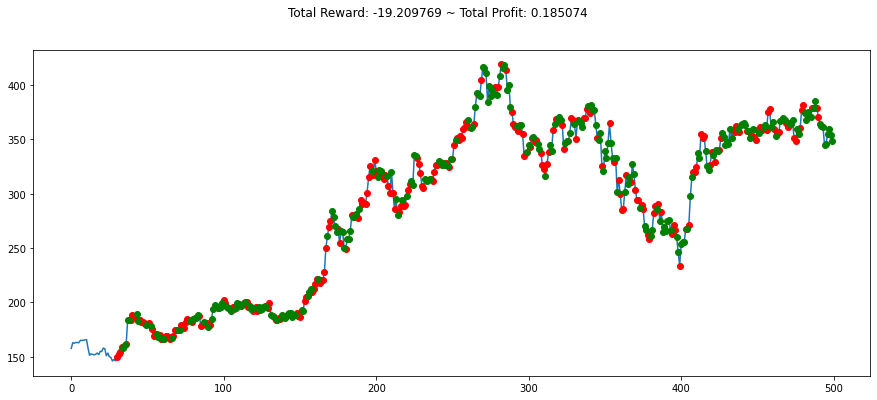

In [ ]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
#adding custom indicators

In [ ]:
#installing and importing dependencies
!pip install finta

In [ ]:
from gym_anytrading.envs import StocksEnv
from finta import TA #technical analysis library

In [ ]:
#fix volume column by converting entries to float by removing commas

In [ ]:
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(",", "")))

In [ ]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [ ]:
#calculate sma, rsi, obv

In [ ]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [ ]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2017-05-24,158.350006,158.479996,157.169998,157.750000,157.750000,2970800.0,0.000000,0.000000,0.0
2017-05-25,161.000000,164.100006,160.550003,163.050003,163.050003,8561000.0,0.000000,100.000000,8561000.0
2017-05-26,162.839996,163.050003,161.119995,162.429993,162.429993,4834300.0,0.000000,88.811395,3726700.0
2017-05-30,163.600006,164.750000,162.710007,163.220001,163.220001,4828600.0,0.000000,90.300552,8555300.0
2017-05-31,163.610001,164.000000,160.740005,163.070007,163.070007,5328900.0,0.000000,87.908222,3226400.0
2017-06-01,163.520004,163.929993,161.699997,162.990005,162.990005,3896300.0,0.000000,86.590533,-669900.0
2017-06-02,163.419998,165.360001,162.800003,165.179993,165.179993,4259100.0,0.000000,90.700041,3589200.0
2017-06-05,165.490005,165.500000,163.429993,165.059998,165.059998,3875200.0,0.000000,89.088993,-286000.0
2017-06-06,164.949997,166.820007,164.509995,165.169998,165.169998,4382100.0,0.000000,89.277025,4096100.0


In [ ]:
#create new enviornment

In [ ]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [ ]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=10, frame_bound=(10,500))

In [ ]:
env2.signal_features

array([[1.57169998e+02, 2.97080000e+06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.60550003e+02, 8.56100000e+06, 0.00000000e+00, 1.00000000e+02,
        8.56100000e+06],
       [1.61119995e+02, 4.83430000e+06, 0.00000000e+00, 8.88113947e+01,
        3.72670000e+06],
       ...,
       [3.53940002e+02, 6.44150000e+06, 3.65446666e+02, 4.69489531e+01,
        2.52630700e+08],
       [3.53790009e+02, 4.72540000e+06, 3.63416667e+02, 4.40581367e+01,
        2.47905300e+08],
       [3.45399994e+02, 4.62150000e+06, 3.60837499e+02, 4.05503739e+01,
        2.43283800e+08]])

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2017-05-24,158.350006,158.479996,157.169998,157.750000,157.750000,2970800.0,0.0,0.000000,0.0
2017-05-25,161.000000,164.100006,160.550003,163.050003,163.050003,8561000.0,0.0,100.000000,8561000.0
2017-05-26,162.839996,163.050003,161.119995,162.429993,162.429993,4834300.0,0.0,88.811395,3726700.0
2017-05-30,163.600006,164.750000,162.710007,163.220001,163.220001,4828600.0,0.0,90.300552,8555300.0
2017-05-31,163.610001,164.000000,160.740005,163.070007,163.070007,5328900.0,0.0,87.908222,3226400.0


In [ ]:
#building and traning enviornment

In [ ]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

# ***A2C Training***


In [ ]:
#a2c training
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

In [ ]:
env = MyCustomEnv(df=df, window_size=10, frame_bound=(500,1100))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 99.11985399999946, 'total_profit': 0.1870922254039134, 'position': 0}


***DQN Traning***

In [ ]:
#dqn traning
model = DQN('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

In [ ]:
env = MyCustomEnv(df=df, window_size=10, frame_bound=(500,1100))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 180.86982799999993, 'total_profit': 0.5215771361618833, 'position': 1}


***PPO Traning***

In [ ]:
#ppo training
model = PPO('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 599           |
|    ep_rew_mean          | 166           |
| time/                   |               |
|    fps                  | 680           |
|    iterations           | 278           |
|    time_elapsed         | 837           |
|    total_timesteps      | 569344        |
| train/                  |               |
|    approx_kl            | 3.5067816e-05 |
|    clip_fraction        | 0.000439      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00213      |
|    explained_variance   | 0.0799        |
|    learning_rate        | 0.0003        |
|    loss                 | 144           |
|    n_updates            | 2770          |
|    policy_gradient_loss | 3.56e-06      |
|    value_loss           | 375           |
-------------------------------------------
-------------------------------------------
| rollout/                |     

In [ ]:
env = MyCustomEnv(df=df, window_size=10, frame_bound=(500,1100))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 171.67004499999985, 'total_profit': 0.9659149699446957, 'position': 1}


***Evaluation of Models***

In [ ]:
#evaluation of models

In [ ]:
env = MyCustomEnv(df=df, window_size=10, frame_bound=(500,1100))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

ValueError: ignored

#***NETFLIX*** 

***A2C NFLX***

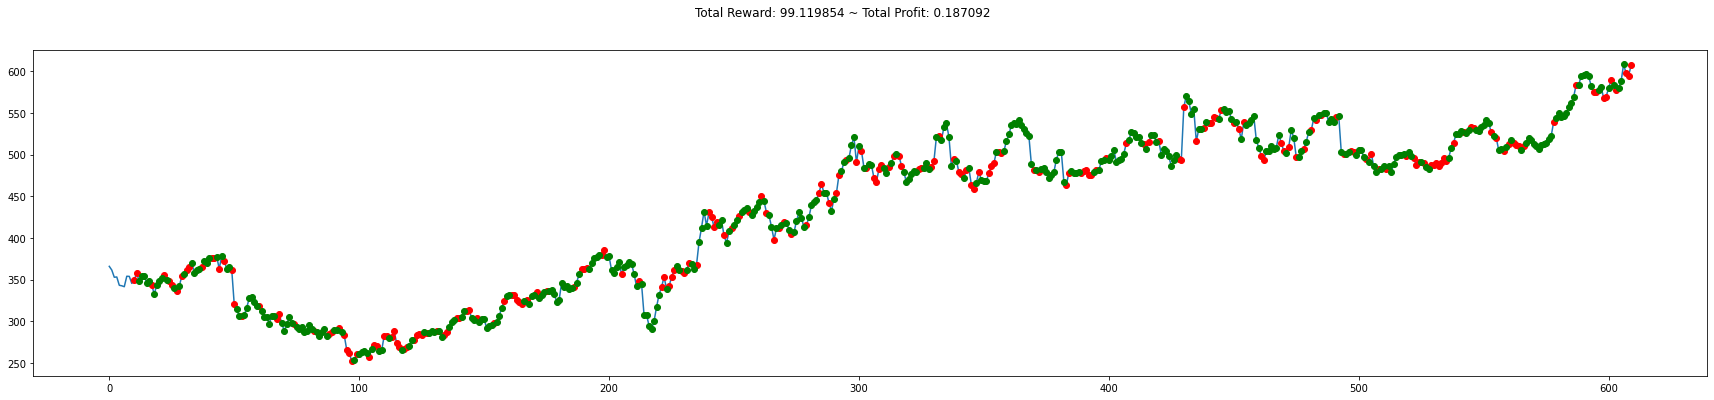

In [ ]:
#A2C
plt.figure(figsize=(30,6))
plt.cla()
env.render_all()
plt.show()

***DQN NFLX***

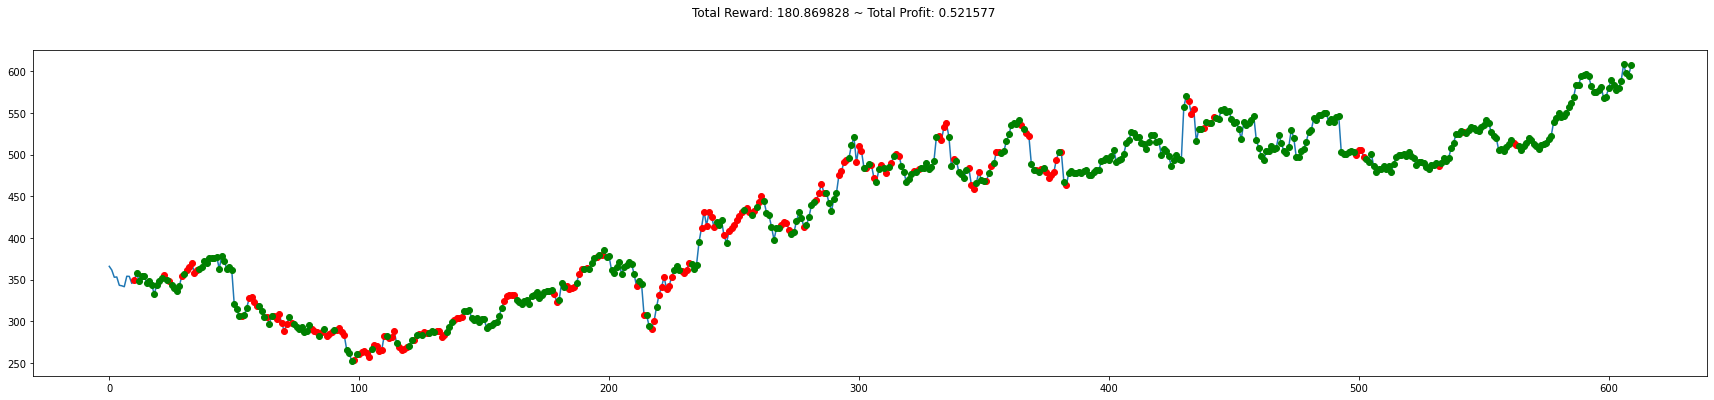

In [ ]:
#DQN
plt.figure(figsize=(30,6))
plt.cla()
env.render_all()
plt.show()

***PPO NFLX***

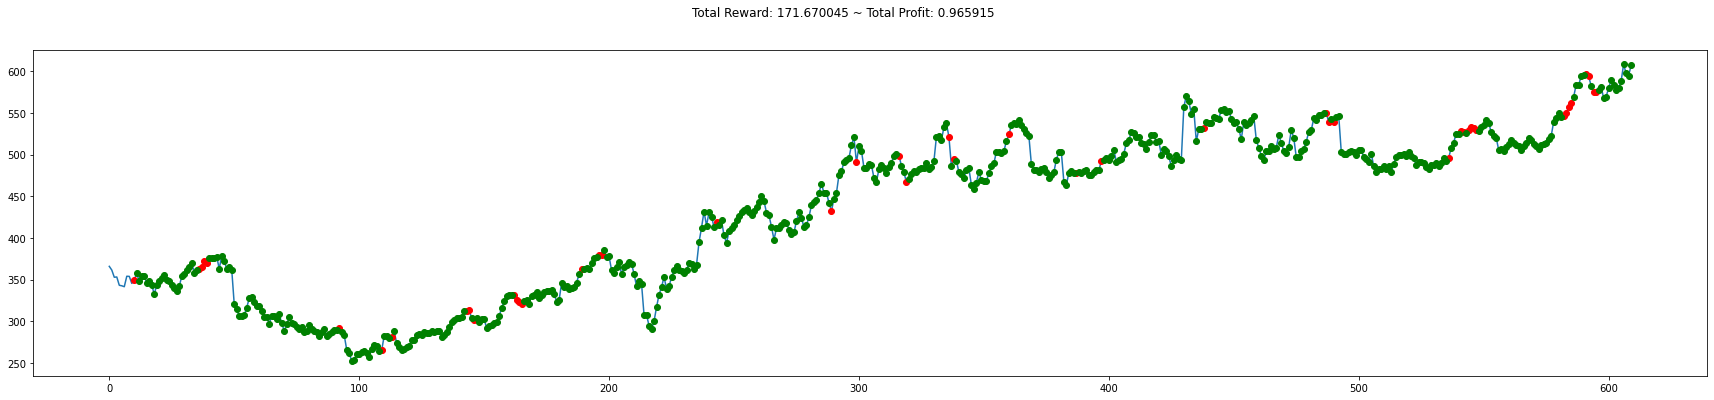

In [ ]:
#PPO
plt.figure(figsize=(30,6))
plt.cla()
env.render_all()
plt.show()

#***AMZN***

***AC2 PLOT AMZN***

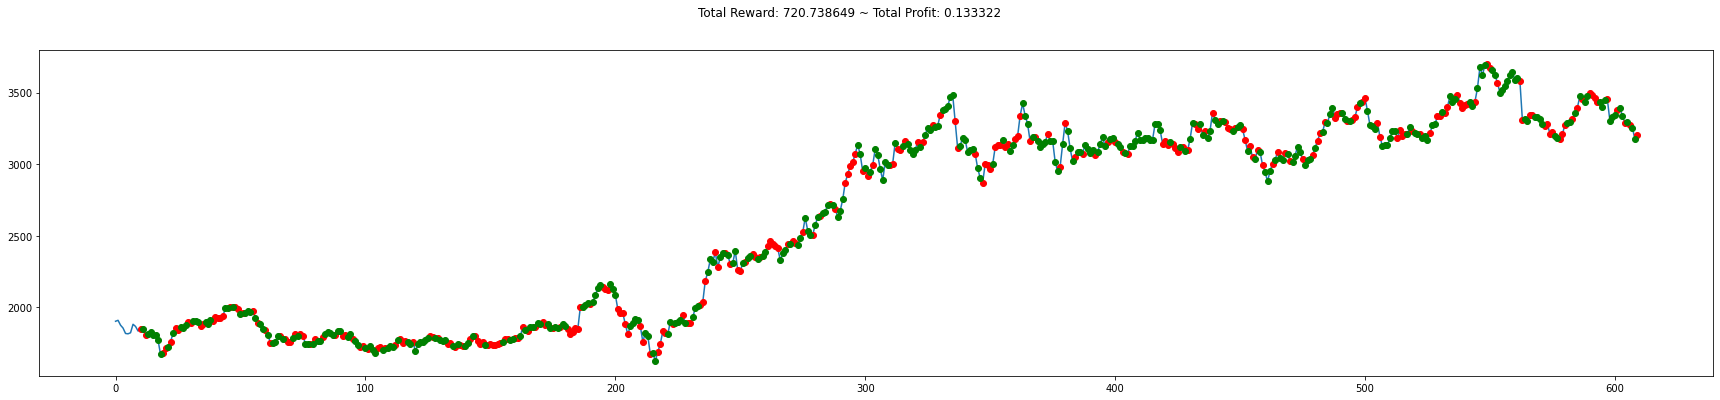

In [ ]:
#A2C
plt.figure(figsize=(30,6))
plt.cla()
env.render_all()
plt.show()

***DQN PLOT AMZN***

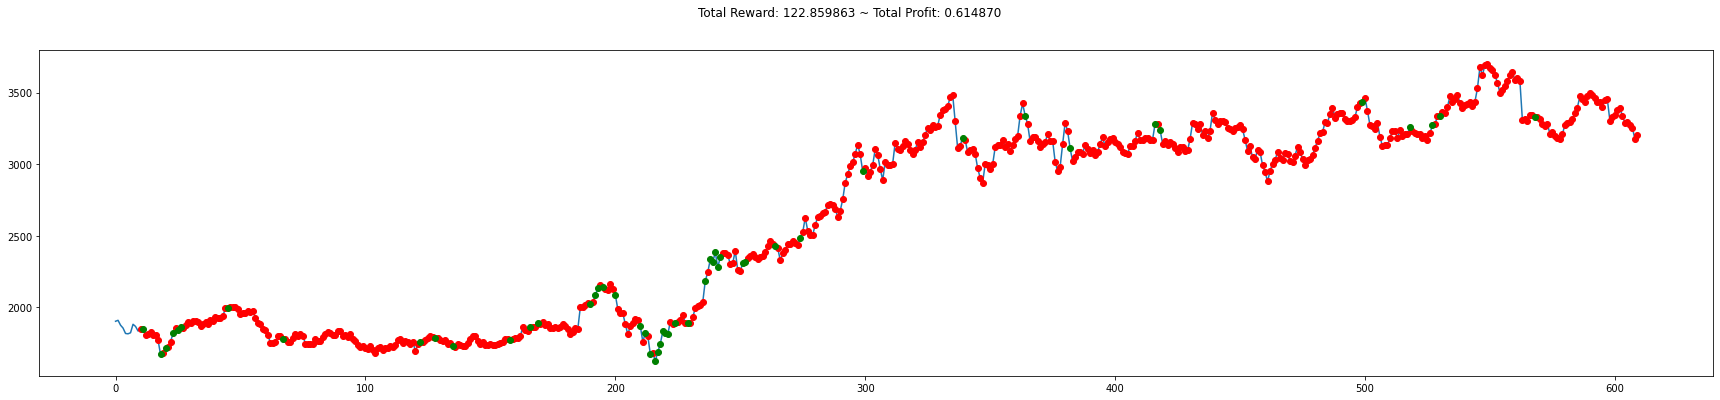

In [ ]:
#DQN
plt.figure(figsize=(30,6))
plt.cla()
env.render_all()
plt.show()




***PPO PLOT AMZN***



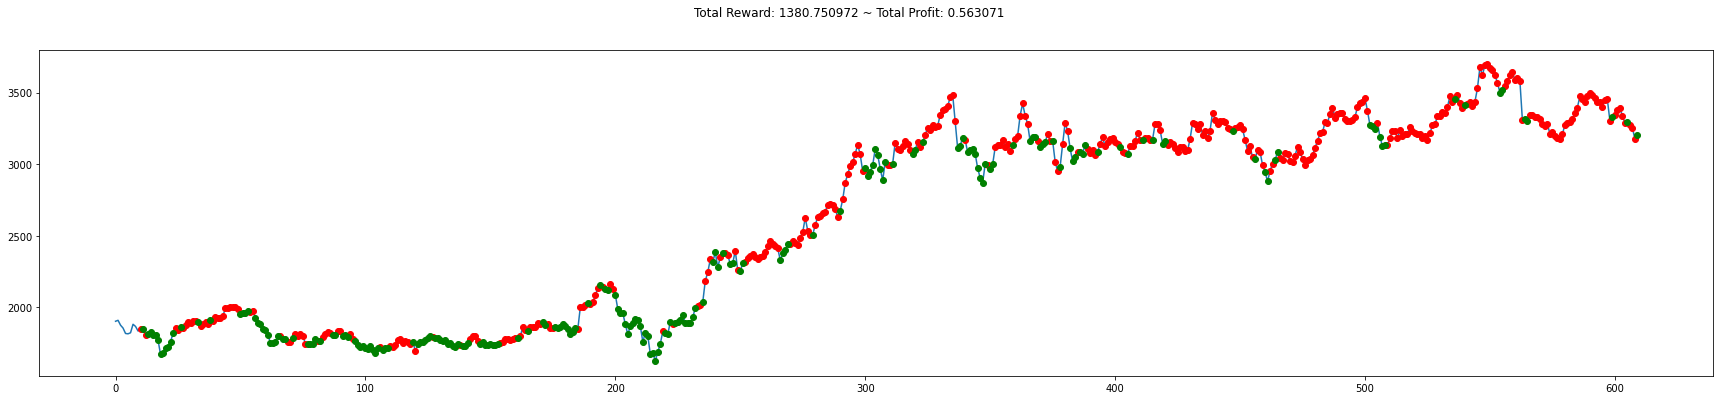

In [ ]:
#PPO
plt.figure(figsize=(30,6))
plt.cla()
env.render_all()
plt.show()

#***BITCOIN DATA***

***A2C PLOT BTC***

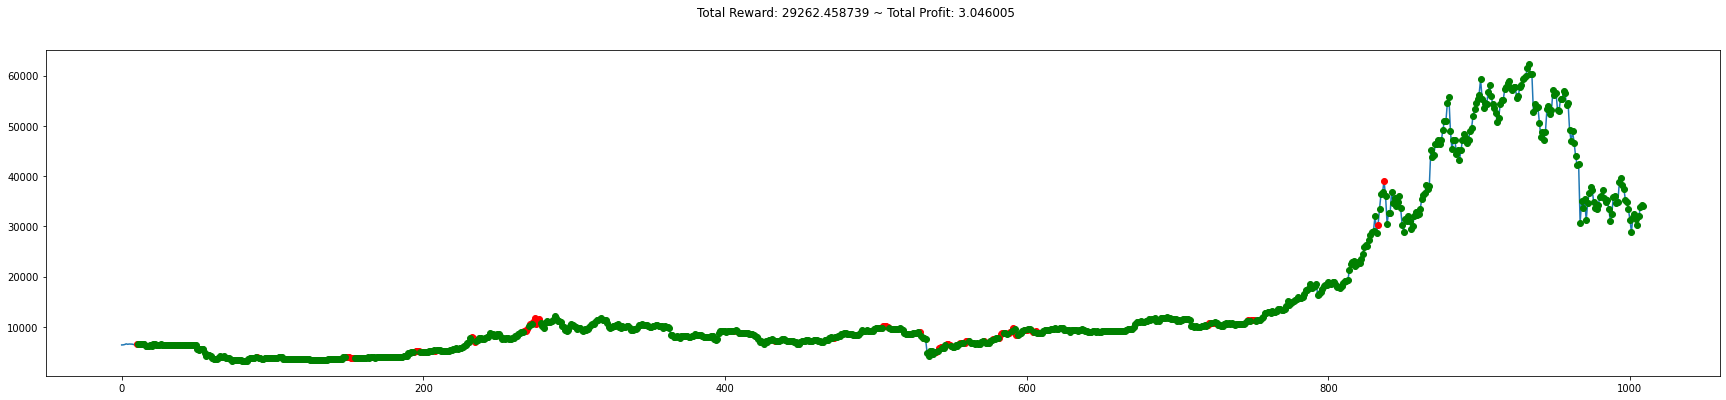

In [ ]:
#A2C
plt.figure(figsize=(30,6))
plt.cla()
env.render_all()
plt.show()

 ***DQN PLOT BTC***

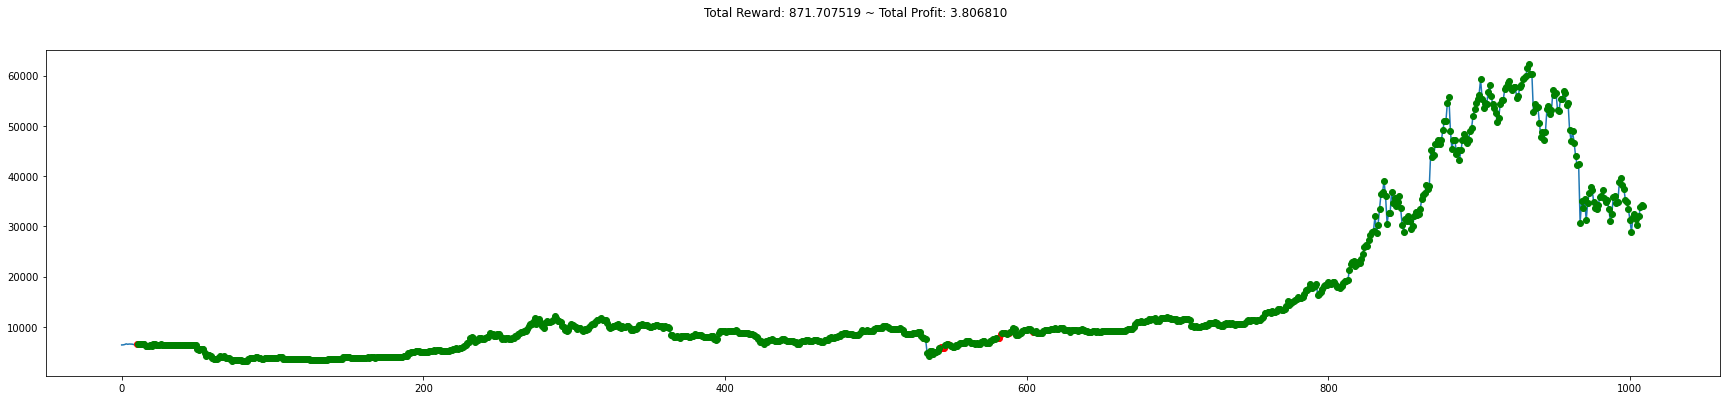

In [ ]:
#DQN
plt.figure(figsize=(30,6))
plt.cla()
env.render_all()
plt.show()

***PPO PLOT BTC***

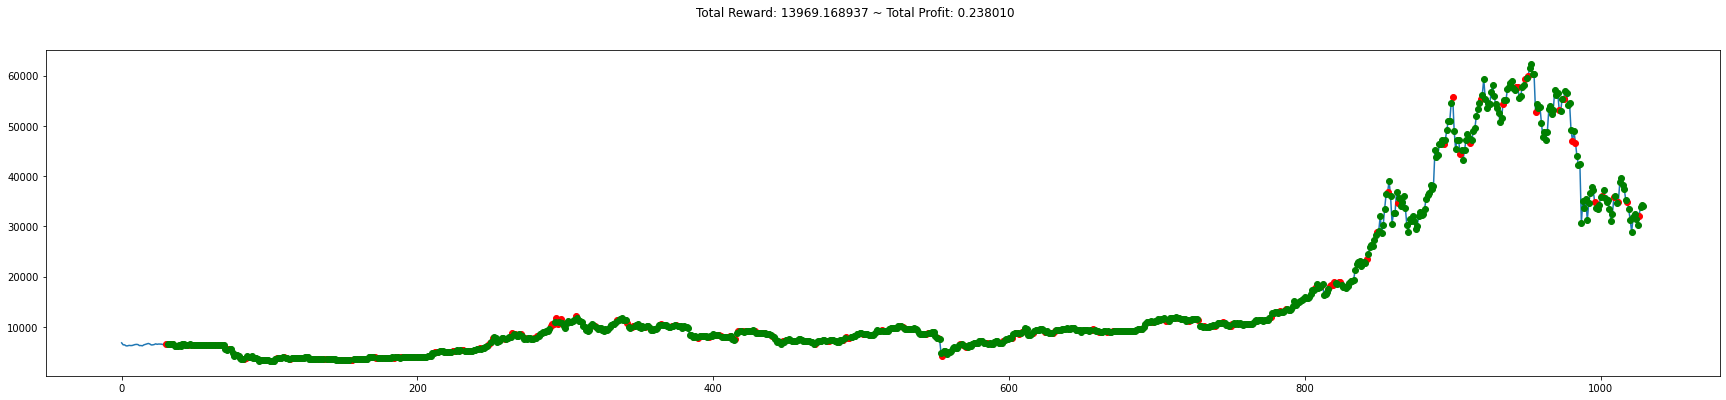

In [ ]:
#PPO
plt.figure(figsize=(30,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
#importing market data amazon
